<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total later 121

In [1]:
#%pip install shap
#%matplotlib inline
#%pip install catboost

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

from catboost import Pool, CatBoostRegressor

# Data

In [3]:
df = pd.read_stata('W:\COVID19\std_inz_later121.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
#df.head()

In [27]:
Y = df['std_inz_later121']
X = df.loc[:, ~df.columns.isin(['std_inz_later121', 'eastwest'])]
print("Number of features: ", len(X.columns))

Number of features:  163


# RF model

In [21]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf=rfr.fit(X, Y)  

# R2 RF model

In [22]:
rf.score(X, Y)

0.8619804469176338

# CatBoost Model

In [6]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0)
#train the model
cb = model.fit(train_pool)

# prediction
preds = cb.predict(train_pool,
                    prediction_type="RawFormulaVal"
                  )
#print(Y.dtype)
preds = preds.reshape(-1, 1)
#print(preds)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression().fit(preds, Y)
print("R2 linReg_model: ", reg.score(preds, Y))
print("RMSE linReg_model: ",metrics.mean_squared_error(preds, Y))

Learning rate set to 0.033171
0:	learn: 46.2994061	total: 147ms	remaining: 2m 27s
1:	learn: 45.9642028	total: 154ms	remaining: 1m 16s
2:	learn: 45.6940598	total: 160ms	remaining: 53.1s
3:	learn: 45.4125930	total: 166ms	remaining: 41.3s
4:	learn: 45.0948692	total: 172ms	remaining: 34.3s
5:	learn: 44.9405582	total: 179ms	remaining: 29.7s
6:	learn: 44.6337440	total: 186ms	remaining: 26.4s
7:	learn: 44.4752761	total: 193ms	remaining: 23.9s
8:	learn: 44.3375095	total: 200ms	remaining: 22.1s
9:	learn: 44.1729003	total: 207ms	remaining: 20.5s
10:	learn: 43.9239025	total: 214ms	remaining: 19.2s
11:	learn: 43.7441473	total: 220ms	remaining: 18.1s
12:	learn: 43.4511222	total: 227ms	remaining: 17.2s
13:	learn: 43.3074815	total: 233ms	remaining: 16.4s
14:	learn: 43.1620562	total: 239ms	remaining: 15.7s
15:	learn: 42.9498806	total: 245ms	remaining: 15.1s
16:	learn: 42.8443192	total: 252ms	remaining: 14.5s
17:	learn: 42.7423823	total: 258ms	remaining: 14s
18:	learn: 42.4476254	total: 263ms	remaining

184:	learn: 23.6162808	total: 1.3s	remaining: 5.75s
185:	learn: 23.5334176	total: 1.31s	remaining: 5.74s
186:	learn: 23.4934461	total: 1.32s	remaining: 5.73s
187:	learn: 23.4123003	total: 1.32s	remaining: 5.72s
188:	learn: 23.3705439	total: 1.33s	remaining: 5.71s
189:	learn: 23.2469781	total: 1.34s	remaining: 5.7s
190:	learn: 23.1893339	total: 1.34s	remaining: 5.69s
191:	learn: 23.1527320	total: 1.35s	remaining: 5.68s
192:	learn: 23.0873713	total: 1.36s	remaining: 5.67s
193:	learn: 23.0088477	total: 1.36s	remaining: 5.66s
194:	learn: 22.9636572	total: 1.37s	remaining: 5.65s
195:	learn: 22.8121076	total: 1.37s	remaining: 5.64s
196:	learn: 22.7614402	total: 1.38s	remaining: 5.63s
197:	learn: 22.6773981	total: 1.39s	remaining: 5.62s
198:	learn: 22.6399649	total: 1.39s	remaining: 5.61s
199:	learn: 22.4828137	total: 1.4s	remaining: 5.6s
200:	learn: 22.4147847	total: 1.41s	remaining: 5.59s
201:	learn: 22.3096486	total: 1.41s	remaining: 5.58s
202:	learn: 22.2159235	total: 1.42s	remaining: 5.5

359:	learn: 12.5060963	total: 2.41s	remaining: 4.28s
360:	learn: 12.4587490	total: 2.41s	remaining: 4.27s
361:	learn: 12.4083736	total: 2.42s	remaining: 4.27s
362:	learn: 12.3403062	total: 2.43s	remaining: 4.26s
363:	learn: 12.2501932	total: 2.43s	remaining: 4.25s
364:	learn: 12.1890332	total: 2.44s	remaining: 4.24s
365:	learn: 12.1520477	total: 2.45s	remaining: 4.24s
366:	learn: 12.1365292	total: 2.45s	remaining: 4.23s
367:	learn: 12.1012687	total: 2.46s	remaining: 4.22s
368:	learn: 12.0578452	total: 2.46s	remaining: 4.21s
369:	learn: 12.0032735	total: 2.47s	remaining: 4.21s
370:	learn: 11.9700462	total: 2.48s	remaining: 4.2s
371:	learn: 11.9458619	total: 2.48s	remaining: 4.19s
372:	learn: 11.8960668	total: 2.49s	remaining: 4.18s
373:	learn: 11.8847531	total: 2.49s	remaining: 4.17s
374:	learn: 11.8689891	total: 2.5s	remaining: 4.17s
375:	learn: 11.8052697	total: 2.51s	remaining: 4.16s
376:	learn: 11.7952079	total: 2.51s	remaining: 4.15s
377:	learn: 11.7495792	total: 2.52s	remaining: 4

536:	learn: 6.8804980	total: 3.5s	remaining: 3.02s
537:	learn: 6.8572618	total: 3.5s	remaining: 3.01s
538:	learn: 6.8535833	total: 3.51s	remaining: 3s
539:	learn: 6.8426040	total: 3.52s	remaining: 3s
540:	learn: 6.8118098	total: 3.52s	remaining: 2.99s
541:	learn: 6.7767098	total: 3.53s	remaining: 2.98s
542:	learn: 6.7548350	total: 3.54s	remaining: 2.98s
543:	learn: 6.7378119	total: 3.54s	remaining: 2.97s
544:	learn: 6.7037865	total: 3.55s	remaining: 2.96s
545:	learn: 6.6761340	total: 3.55s	remaining: 2.96s
546:	learn: 6.6427961	total: 3.56s	remaining: 2.95s
547:	learn: 6.6176499	total: 3.57s	remaining: 2.94s
548:	learn: 6.6045491	total: 3.57s	remaining: 2.94s
549:	learn: 6.6011013	total: 3.58s	remaining: 2.93s
550:	learn: 6.5747453	total: 3.58s	remaining: 2.92s
551:	learn: 6.5691683	total: 3.59s	remaining: 2.91s
552:	learn: 6.5381198	total: 3.6s	remaining: 2.91s
553:	learn: 6.5338602	total: 3.6s	remaining: 2.9s
554:	learn: 6.5231265	total: 3.61s	remaining: 2.89s
555:	learn: 6.5047604	t

710:	learn: 3.8717567	total: 4.61s	remaining: 1.87s
711:	learn: 3.8532423	total: 4.61s	remaining: 1.86s
712:	learn: 3.8405651	total: 4.62s	remaining: 1.86s
713:	learn: 3.8286673	total: 4.63s	remaining: 1.85s
714:	learn: 3.8133200	total: 4.63s	remaining: 1.85s
715:	learn: 3.7990631	total: 4.64s	remaining: 1.84s
716:	learn: 3.7854539	total: 4.64s	remaining: 1.83s
717:	learn: 3.7695933	total: 4.65s	remaining: 1.83s
718:	learn: 3.7636670	total: 4.66s	remaining: 1.82s
719:	learn: 3.7521021	total: 4.67s	remaining: 1.81s
720:	learn: 3.7384459	total: 4.67s	remaining: 1.81s
721:	learn: 3.7297805	total: 4.68s	remaining: 1.8s
722:	learn: 3.7187809	total: 4.68s	remaining: 1.79s
723:	learn: 3.6983369	total: 4.69s	remaining: 1.79s
724:	learn: 3.6950151	total: 4.7s	remaining: 1.78s
725:	learn: 3.6909977	total: 4.7s	remaining: 1.77s
726:	learn: 3.6771302	total: 4.71s	remaining: 1.77s
727:	learn: 3.6577446	total: 4.72s	remaining: 1.76s
728:	learn: 3.6403980	total: 4.72s	remaining: 1.75s
729:	learn: 3.6

885:	learn: 2.1737981	total: 5.71s	remaining: 734ms
886:	learn: 2.1609758	total: 5.71s	remaining: 728ms
887:	learn: 2.1572258	total: 5.72s	remaining: 721ms
888:	learn: 2.1492024	total: 5.72s	remaining: 715ms
889:	learn: 2.1381965	total: 5.73s	remaining: 708ms
890:	learn: 2.1287667	total: 5.74s	remaining: 702ms
891:	learn: 2.1263536	total: 5.74s	remaining: 695ms
892:	learn: 2.1176364	total: 5.75s	remaining: 689ms
893:	learn: 2.1166547	total: 5.75s	remaining: 682ms
894:	learn: 2.1059426	total: 5.76s	remaining: 676ms
895:	learn: 2.0995461	total: 5.77s	remaining: 669ms
896:	learn: 2.0973840	total: 5.77s	remaining: 663ms
897:	learn: 2.0858723	total: 5.78s	remaining: 656ms
898:	learn: 2.0738901	total: 5.79s	remaining: 650ms
899:	learn: 2.0664668	total: 5.79s	remaining: 643ms
900:	learn: 2.0589864	total: 5.8s	remaining: 637ms
901:	learn: 2.0501147	total: 5.8s	remaining: 631ms
902:	learn: 2.0437300	total: 5.81s	remaining: 624ms
903:	learn: 2.0389624	total: 5.82s	remaining: 618ms
904:	learn: 2.

# R2 CatBoost

In [7]:
cb.score(X, Y)

0.9989474320278661

# SHAP values 

# RF

In [23]:
shap_values = shap.TreeExplainer(rf).shap_values(X)

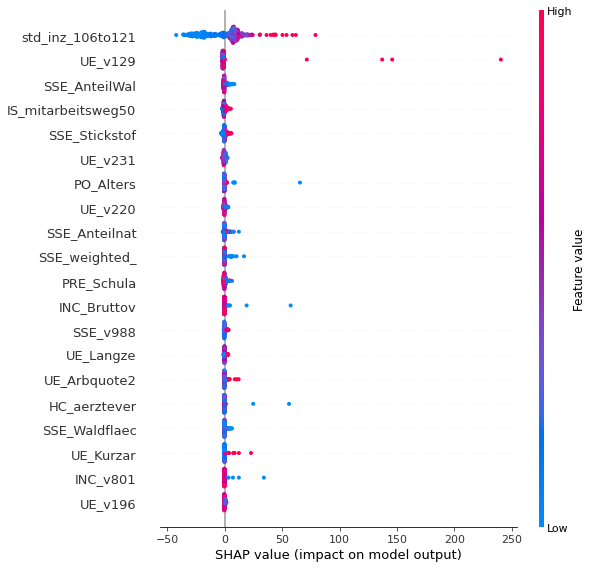

In [24]:
shap.summary_plot(shap_values, X,max_display=20) 

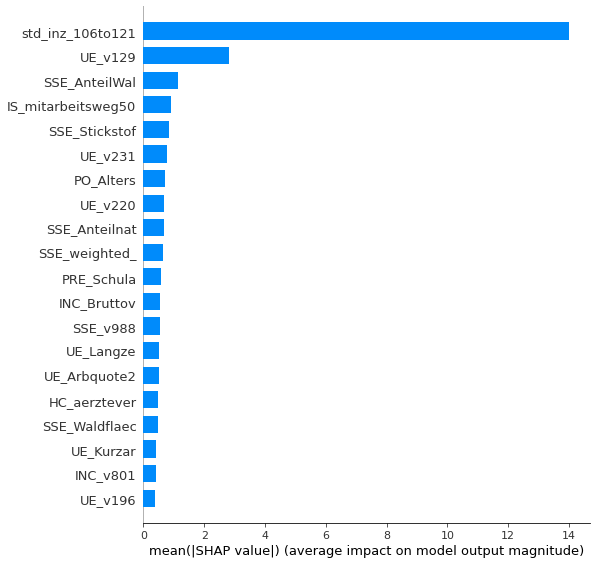

In [25]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=20)

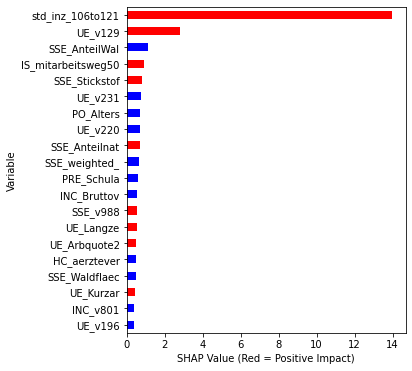

In [26]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

# CatBoost

In [8]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

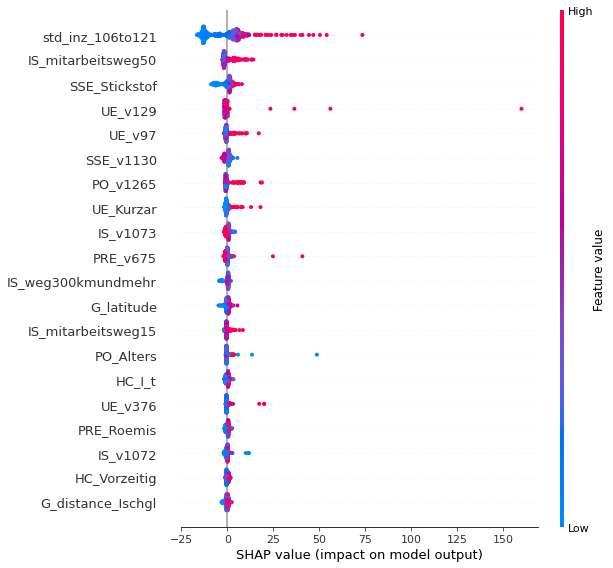

In [9]:
shap.summary_plot(shap_values_cb, X,max_display=20)  #TreeExpliner

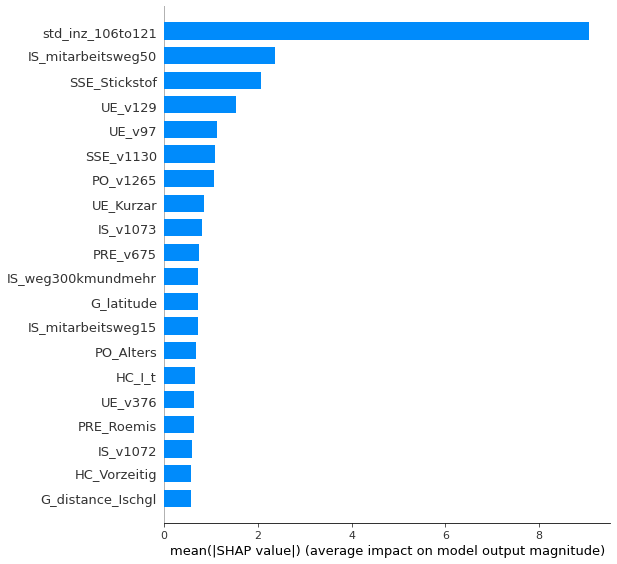

In [10]:
shap.summary_plot(shap_values_cb, X, plot_type="bar",max_display=20)

invalid value encountered in true_divide
invalid value encountered in true_divide


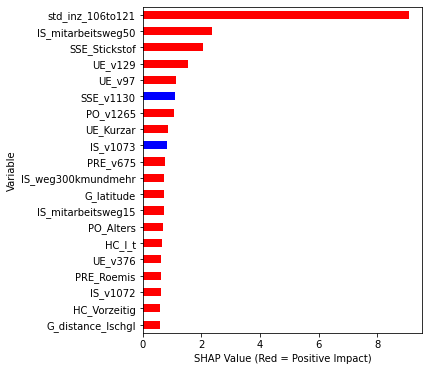

In [11]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 

# CatBoost 20 most important vars

In [12]:
f = len(X.columns)
l = f-21
ll = f-11


In [13]:
top20feature = X.columns[np.argsort(np.abs(shap_values_cb).mean(0))][f:l:-1]
top10feature = X.columns[np.argsort(np.abs(shap_values_cb).mean(0))][f:ll:-1]

X[top20feature].describe()

,std_inz_106to121,IS_mitarbeitsweg50,SSE_Stickstof,UE_v129,UE_v97,SSE_v1130,PO_v1265,UE_Kurzar,IS_v1073,PRE_v675,IS_weg300kmundmehr,G_latitude,IS_mitarbeitsweg15,PO_Alters,HC_I_t,UE_v376,PRE_Roemis,IS_v1072,HC_Vorzeitig,G_distance_Ischgl
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,35.316822,0.243392,68.331619,5.669324,-8.350618,-86.781784,48.195293,0.752618,88.700745,16.566586,2.401995,50.615292,0.234663,2.619949,2.048272,20.240156,32.242809,531.122192,1.722194,431.346405
std,34.207966,1.409296,27.160894,9.243236,18.685118,6.361413,1.583288,1.440882,14.054542,5.035090,0.892102,1.740311,0.842361,1.530833,0.558674,4.537329,24.361435,495.516785,0.359209,187.236847
min,0.000000,-5.300000,21.400000,-22.299999,-51.700001,-93.599998,42.799999,0.000000,20.000000,6.900000,0.900000,47.500000,-3.100000,0.000000,0.959713,10.800000,1.700000,103.000000,0.900000,56.052784
25%,11.892441,-0.400000,47.500000,1.000000,-21.000000,-88.199997,47.400002,0.000000,83.000000,13.000000,1.700000,49.283333,0.000000,1.600000,1.628259,17.000000,7.900000,223.000000,1.400000,291.752441
50%,25.522655,0.500000,59.200001,8.500000,-9.300000,-87.500000,48.400002,0.300000,94.000000,16.100000,2.200000,50.549999,0.400000,2.300000,1.995482,19.299999,29.100000,360.000000,1.700000,420.680756
75%,47.308884,1.100000,88.199997,12.000000,3.800000,-86.500000,49.200001,0.900000,99.000000,19.700001,2.900000,51.849998,0.700000,3.100000,2.405437,22.400000,52.299999,617.000000,1.900000,569.178772
max,223.532379,4.200000,150.699997,26.600000,61.299999,0.000000,51.900002,19.600000,100.000000,38.000000,5.900000,54.783333,2.300000,8.900000,4.035901,38.500000,87.800003,4338.000000,2.800000,866.911194


In [14]:
# initialize Pool
train_pool20 = Pool(data=X[top20feature],
                  label=Y,
                 feature_names = list(X[top20feature].columns))
 

# specify the training parameters 
model20 = CatBoostRegressor(random_seed=0,
                          logging_level="Silent"
                         )
#train the model
cb20 = model20.fit(train_pool20)

In [15]:
# prediction
preds20 = cb20.predict(train_pool20,
                    prediction_type="RawFormulaVal"
                  )
#print(Y.dtype)
preds20 = preds20.reshape(-1, 1)
#print(preds20)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg20 = LinearRegression().fit(preds20, Y)
print("R2 linReg_model20: ", reg.score(preds20, Y))
print("RMSE linReg_model20: ",metrics.mean_squared_error(preds20, Y))


R2 linReg_model20:  0.9923286504805189
RMSE linReg_model20:  18.48692575216736


# R2 CatBoost top20

In [16]:
cb20.score(X[top20feature], Y)

0.9914323906508471

# cross validation

In [17]:
# all
import random
iterations = range(0,40)
r2_reg_k_test = list(range(0,40))
rmse_reg_k_test = list(range(0,40))
r2_cb_k_train = list(range(0,40))
r2_cb_k_test = list(range(0,40))
for i in iterations:
    rs = random.sample(range(0,401), 100)
    k_test_x = X.iloc[rs]
    k_test_y = Y.iloc[rs]
    k_train_x = X.drop(rs)
    k_train_y = Y.drop(rs)
    # initialize Pool 
    train_pool_k = Pool(data=k_train_x,
                        label=k_train_y,
                        feature_names = list(X.columns))
        
    test_pool_k = Pool(data=k_test_x,
                       label=k_test_y,
                       feature_names = list(X.columns))
 
    model = CatBoostRegressor(random_seed=0, logging_level="Silent")
    #train the model
    cb_k = model.fit(train_pool_k)
    # make the prediction using the resulting model
    preds_k = cb_k.predict(test_pool_k,
                    prediction_type="RawFormulaVal"
                  )
    preds_k = preds_k.reshape(-1, 1)
    #LinearRegression
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    reg_k = LinearRegression().fit(preds_k, k_test_y)
    print(i/len(iterations)*100, "% done; "," R2_reg_test:",reg_k.score(preds_k, k_test_y)) 
    #print("RMSE",metrics.mean_squared_error(preds_k, k_test_y)) 
    #print("R2_cb_train:",cb_k.score(train_pool_k)) 
    #print("R2_cb_test:",cb_k.score(test_pool_k))
    
    r2_reg_k_test[i] = reg_k.score(preds_k, k_test_y)
    rmse_reg_k_test[i] = metrics.mean_squared_error(preds_k, k_test_y)
    r2_cb_k_train[i] = cb_k.score(train_pool_k)
    r2_cb_k_test[i] =  cb_k.score(test_pool_k)

0.0 % done;   R2_reg_test: 0.08313179546956284
2.5 % done;   R2_reg_test: 0.09712179459012527
5.0 % done;   R2_reg_test: 0.10731559913149291
7.5 % done;   R2_reg_test: 0.32555578145280106
10.0 % done;   R2_reg_test: 0.2971564622026509
12.5 % done;   R2_reg_test: 0.13106339457532723
15.0 % done;   R2_reg_test: 0.15385225346165898
17.5 % done;   R2_reg_test: 0.12423751997249055
20.0 % done;   R2_reg_test: 0.20373202286162073
22.5 % done;   R2_reg_test: 0.1690268572970779
25.0 % done;   R2_reg_test: 0.09265739770826564
27.500000000000004 % done;   R2_reg_test: 0.2690452754531051
30.0 % done;   R2_reg_test: 0.17226775728357424
32.5 % done;   R2_reg_test: 0.08273738930479635
35.0 % done;   R2_reg_test: 0.2438877816461814
37.5 % done;   R2_reg_test: 0.12507829572795104
40.0 % done;   R2_reg_test: 0.13101474317811623
42.5 % done;   R2_reg_test: 0.11515914663902205
45.0 % done;   R2_reg_test: 0.22614682704699796
47.5 % done;   R2_reg_test: 0.1826745175184895
50.0 % done;   R2_reg_test: 0.27273

In [18]:
print("Mean R2 of linReg_modesl: ", sum(r2_reg_k_test)/len(r2_reg_k_test))
print("Mean R2 of CatBoost_models:",sum(r2_cb_k_train)/len(r2_cb_k_train))

Mean R2 of linReg_modesl:  0.1749948249060198
Mean R2 of CatBoost_models: 0.9995551800299751


In [19]:
import random
iterations = range(0,40)
r2_reg_k_test = list(range(0,40))
rmse_reg_k_test = list(range(0,40))
r2_cb_k_train = list(range(0,40))
r2_cb_k_test = list(range(0,40))
for i in iterations:
    rs = random.sample(range(0,401), 100)
    k_test_x = X[top20feature].iloc[rs]
    k_test_y = Y.iloc[rs]
    k_train_x = X[top20feature].drop(rs)
    k_train_y = Y.drop(rs)
    # initialize Pool 
    train_pool_k = Pool(data=k_train_x,
                        label=k_train_y,
                        feature_names = list(X[top20feature].columns))
        
    test_pool_k = Pool(data=k_test_x,
                       label=k_test_y,
                       feature_names = list(X[top20feature].columns))
 
    model = CatBoostRegressor(random_seed=0, logging_level="Silent")
    #train the model
    cb_k = model.fit(train_pool_k)
    # make the prediction using the resulting model
    preds_k = cb_k.predict(test_pool_k,
                    prediction_type="RawFormulaVal"
                  )
    preds_k = preds_k.reshape(-1, 1)
    #LinearRegression
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    reg_k = LinearRegression().fit(preds_k, k_test_y)
    print(i/len(iterations)*100, "% done; "," R2_reg_test:",reg_k.score(preds_k, k_test_y)) 
    #print("RMSE",metrics.mean_squared_error(preds_k, k_test_y)) 
    #print("R2_cb_train:",cb_k.score(train_pool_k)) 
    #print("R2_cb_test:",cb_k.score(test_pool_k))
    
    r2_reg_k_test[i] = reg_k.score(preds_k, k_test_y)
    rmse_reg_k_test[i] = metrics.mean_squared_error(preds_k, k_test_y)
    r2_cb_k_train[i] = cb_k.score(train_pool_k)
    r2_cb_k_test[i] =  cb_k.score(test_pool_k)

0.0 % done;   R2_reg_test: 0.3106203303687807
2.5 % done;   R2_reg_test: 0.38172377694029846
5.0 % done;   R2_reg_test: 0.18372011485172446
7.5 % done;   R2_reg_test: 0.3504568572219168
10.0 % done;   R2_reg_test: 0.23634333754947467
12.5 % done;   R2_reg_test: 0.347637315289409
15.0 % done;   R2_reg_test: 0.09196186374228943
17.5 % done;   R2_reg_test: 0.20671252790781536
20.0 % done;   R2_reg_test: 0.179922269088028
22.5 % done;   R2_reg_test: 0.2475546488073348
25.0 % done;   R2_reg_test: 0.25507975263245286
27.500000000000004 % done;   R2_reg_test: 0.14991973648773504
30.0 % done;   R2_reg_test: 0.1153319863967549
32.5 % done;   R2_reg_test: 0.1847372399927325
35.0 % done;   R2_reg_test: 0.2736516450542208
37.5 % done;   R2_reg_test: 0.41199327931485663
40.0 % done;   R2_reg_test: 0.21387436569621943
42.5 % done;   R2_reg_test: 0.17474104019602088
45.0 % done;   R2_reg_test: 0.33621893099013056
47.5 % done;   R2_reg_test: 0.14826210947194385
50.0 % done;   R2_reg_test: 0.1115447209

In [20]:
print("Mean R2 of linReg_modesl: ", sum(r2_reg_k_test)/len(r2_reg_k_test))
print("Mean R2 of CatBoost_models:",sum(r2_cb_k_train)/len(r2_cb_k_train))

Mean R2 of linReg_modesl:  0.25858407340462675
Mean R2 of CatBoost_models: 0.9958862790229233
